In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("pastel")

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

In [3]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# 데이터 프레임 확인
df.shape

(1338, 7)

In [4]:
# 데이터 타입 확인
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
# 결측값 확인
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# 칼럼별 데이터 요약
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## #1-1 지역에 따라 의료비는 어떻게 다를까?

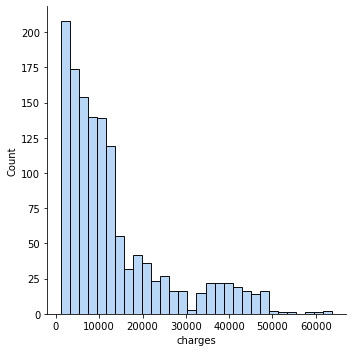

In [7]:
# charges 분포
sns.displot(df,x='charges')

In [8]:
region_df=df.groupby('region')["charges","bmi"]
region=region_df.mean().sort_values('charges',ascending=False)
region.style.background_gradient(cmap='Blues',low=1)

<ipython-input-8-6aac992dce64>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  region_df=df.groupby('region')["charges","bmi"]


,charges,bmi
region,,
southeast,14735.411438,33.355989
northeast,13406.384516,29.173503
northwest,12417.575374,29.199785
southwest,12346.937377,30.596615


[Text(0.5, 1.0, 'Region Vs Charges')]

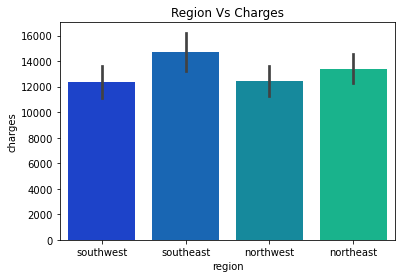

In [9]:
#1
sns.barplot(x='region',y='charges',data=df, palette='winter').set(title='Region Vs Charges')

## #1-2 지역에 따라 BMI지수는 어떻게 다를까?

[Text(0.5, 1.0, 'bmi vs region')]

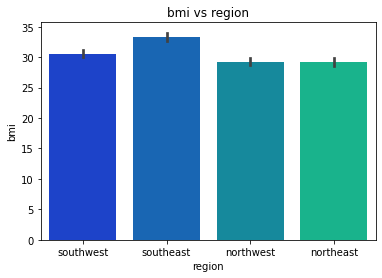

In [10]:
#2
sns.barplot(x="region",y='bmi',data=df, palette='winter').set(title='bmi vs region')

In [11]:
#bmi와 charges가 비슷한 양상을 보이네?
#그렇다면 bmi와 charges는 관련이 있겠구나
#->이거에 관련되 자료 찾기

## #2 흡연은 나이에 상관없이 의료비에 영향을 미치는가?

In [12]:
smoker_df = df.groupby('smoker')['charges','age']
smoker_df.mean().sort_values('charges')

<ipython-input-12-16bf3ef17dc5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  smoker_df = df.groupby('smoker')['charges','age']


,charges,age
smoker,,
no,8434.268298,39.385338
yes,32050.231832,38.514599


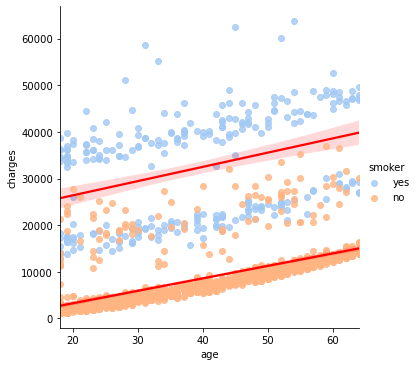

In [13]:
#3
sns.lmplot(data=df,x='age',y='charges',hue='smoker',line_kws={'color': 'red'})
plt.show()
#나이와 치료비는 비례, smoker가 전반적으로 치료비가 더 높음
#나이와 치료비는 관련이 있다, smoke는 나이에 상관없이 charges에 영향을 미침

### #3 흡연이 의료비에 영향을 미친다면 지역에 상관없이 영향을 미치는가?

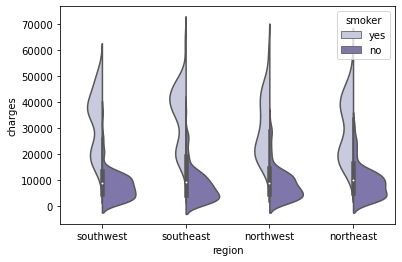

In [14]:
#4
sns.violinplot(y = df.charges, x = df.region, hue = df.smoker, split=True, palette='Purples')
plt.show()

#예상대로 흡연은 지역에 상관없이 charges에 영향을 미침.
#->흡연과 지역의 상관관계는 낮을 것이라 생각.

### #5 흡연 여부에 따라 BMI지수와 의료비의 상관관계는 어떻게 달라질까?

<Figure size 576x576 with 0 Axes>

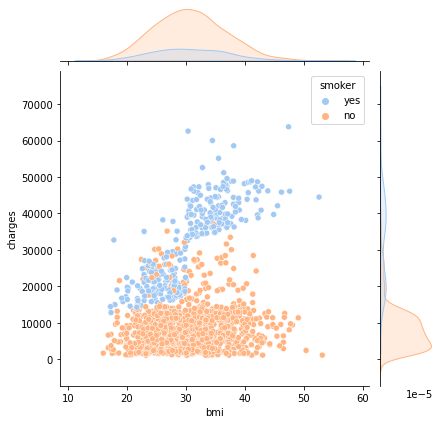

In [15]:
#5
plt.figure(figsize=(8,8))
sns.jointplot(x = df.bmi, y = df.charges, hue = df.smoker)
plt.show()
#bmi가 미치는 영향보다 smoke의 여부가 미치는 영향이 훨씬 큼
###bmi가 흡연자가 아니면 영향이 적고, 흡연자이면 영향이 높아짐
#->이거에 대한 자료 찾아보면 좋을 듯

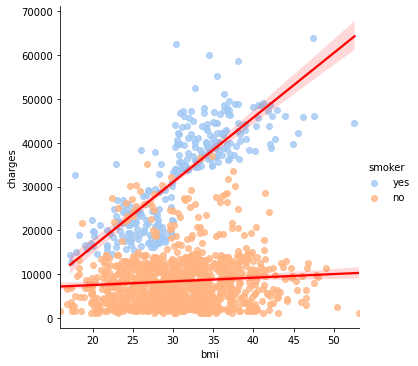

In [16]:
sns.lmplot(data=df,x='bmi',y='charges',hue='smoker',line_kws={'color': 'red'})

### #6 남/녀의 의료비 중 흡연의 영향을 더 많이 받는 쪽은 어디일까?

In [17]:
# 남/녀 흡연 여부
df.groupby(['sex'])['smoker'].value_counts()

sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
Name: smoker, dtype: int64

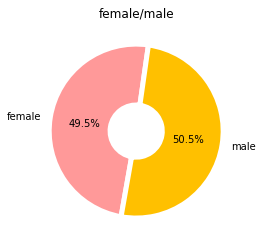

In [18]:
# 남녀 비율
ratio = [662, 676]
labels = ['female', 'male']
colors = ['#ff9999', '#ffc000']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.title('female/male')
plt.show()

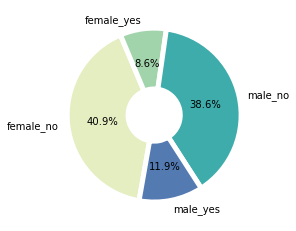

In [19]:
# 남녀 흡연자 비율
ratio = [547, 115, 517, 159]
labels = ['female_no', 'female_yes','male_no','male_yes']
colors = ['#E5EEC1', '#A2D4AB','#3EACAB', '#547AB2']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()


Text(0.5, 1.0, 'smoker by sex')

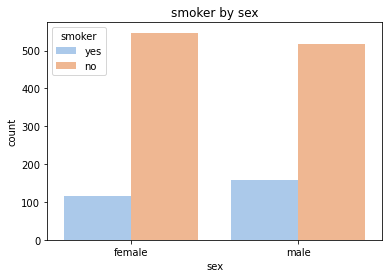

In [40]:
sns.countplot(x = 'sex', hue = 'smoker', data = df)
plt.title("smoker by sex")

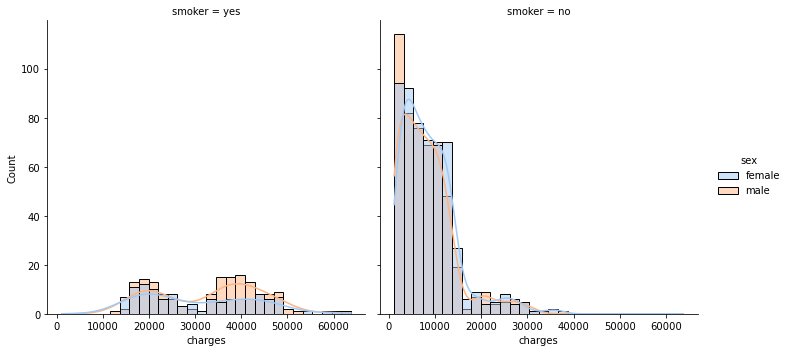

In [20]:
#6
sns.displot(data=df, x='charges', col='smoker', hue='sex', kde=True)
#smoker가 yes인 사람들 중 male이 치료비가 고액이 사람들이 더 많고 비흡연자이면 저액인 사람이 더 많음=> 담배가 여자보다 남자한테 더 해롭나?하는 의문

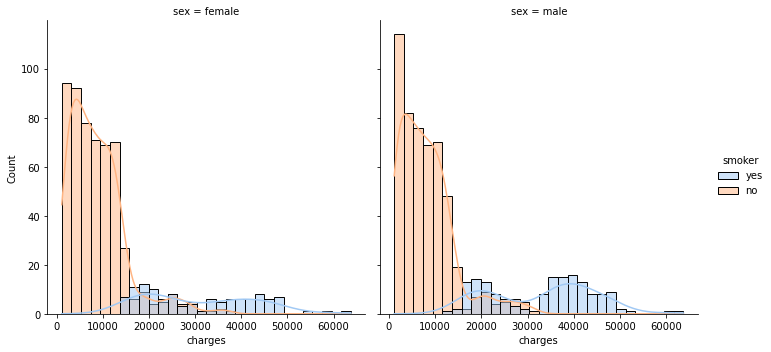

In [21]:
sns.displot(data=df, x='charges', col='sex', hue='smoker', kde=True)

In [22]:
#남녀 성별에 따라 smoke가 미치는 영향 찾기

### #7 부양가족의 수에 따라 의료비는 달라질까?

<AxesSubplot:xlabel='children', ylabel='charges'>

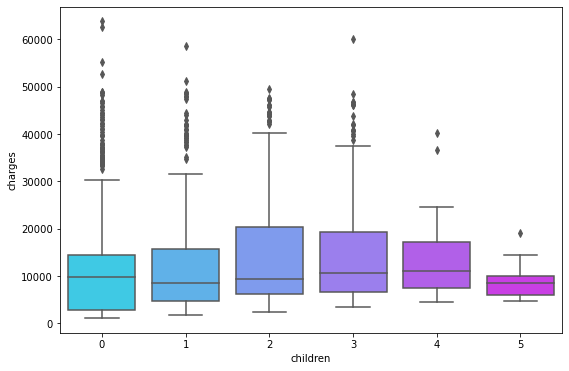

In [23]:
#7
plt.figure(figsize=(9,6))
sns.boxplot(x="children",y='charges',data=df, palette='cool')
#자녀의 수와 의료비 사이의 연관관계를 찾기 어려움
#상관관계가 별로 없다고 판단

<AxesSubplot:xlabel='children', ylabel='charges'>

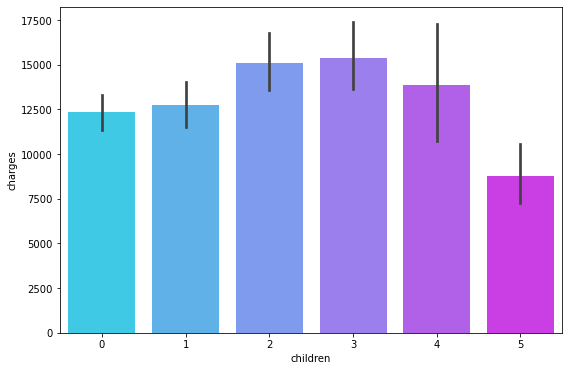

In [24]:
plt.figure(figsize=(9,6))
sns.barplot(x="children",y='charges',data=df, palette='cool')

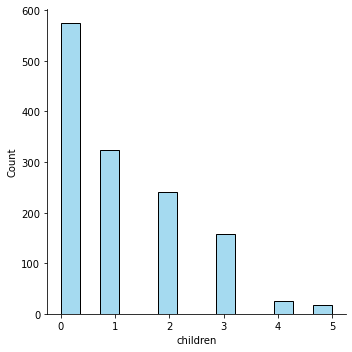

In [25]:
sns.set_palette("pastel")
sns.displot(x="children",data=df, color='skyblue')
#더군다나 children의 수에 따른 표본의 수가 비슷하지가 않아서 일반화할 수 없음 

# **위의 시각화를 토대로 순위 정해보기

# Multiple Linear Regression(다중 선형 회귀 분석)

In [4]:
# OneHotEncoding
change_col = ['sex','smoker','region']
ohe_encode = pd.get_dummies(df,columns=change_col,dtype='int8')

In [5]:
ohe_encode.columns.values

array(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'], dtype=object)

In [6]:
ohe_encode

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


<AxesSubplot:>

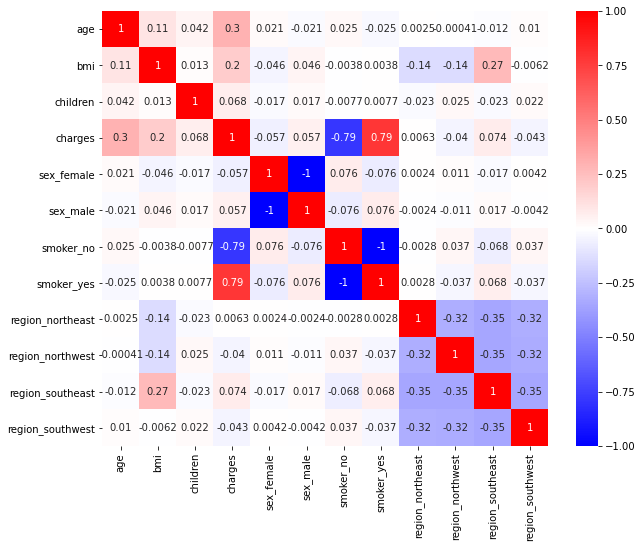

In [7]:
# 변수간 상관관계
plt.figure(figsize=(10,8))
corr=ohe_encode.corr()
sns.heatmap(corr,cmap="bwr",annot=True)

In [8]:
# train data: 20%
X = ohe_encode.drop('charges',axis=1)
y = ohe_encode['charges']

In [9]:
# Standard Scaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
# 1차원 array를 2차원 matrix로 변환
y_train = np.array(y_train).reshape(-1, 1)
y_train = pd.DataFrame(y_train)
y_test = np.array(y_test).reshape(-1, 1)
y_test = pd.DataFrame(y_test)

In [11]:
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression()

In [12]:
print(linear_reg.coef_)
print(linear_reg.intercept_)

[[3.59840497e+03 2.07879536e+03 5.39677407e+02 1.56170312e+16
  1.56170312e+16 2.13773605e+17 2.13773605e+17 2.48709421e+16
  2.48970079e+16 2.58363361e+16 2.48970079e+16]]
[13321.71473636]


In [13]:
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)

100%의 정확도라면 하나의 직선 위에 모든 점들이 위치하겠지만, 현재 모델은 약 78%의 정확도로 인해 오차가 발생하는 것으로 보인다.

In [14]:
# train data 모델평가
r2_test = r2_score(y_train,y_pred_train)
print(r2_test)
mse_test = mean_squared_error(y_train,y_pred_train)
print(mse_test)
mae_test = mean_absolute_error(y_train,y_pred_train)
print(mae_test)

0.7416117965778222
37294105.26472191
4233.288694592419


In [15]:
# test data 모델 평가
r2_test = r2_score(y_test,y_pred_test)
print(r2_test)
mse_test = mean_squared_error(y_test,y_pred_test)
print(mse_test)
mae_test = mean_absolute_error(y_test,y_pred_test)
print(mae_test)

0.7830756149785154
33677235.60421856
4208.389206221056


Text(0.5, 1.0, 'y_test vs y_pred')

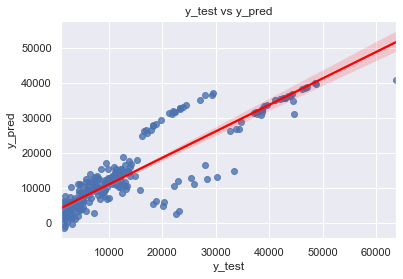

In [16]:
# x축: 실제 charges, y축: 예측 charges
sns.set()
plt.figure(figsize=(6,4))
ax = sns.regplot(x=y_test,y=y_pred_test,line_kws={'color': 'red'})
ax.set_xlabel("y_test")
ax.set_ylabel("y_pred")
ax.set_title("y_test vs y_pred")

In [17]:
print(linear_reg.score(X_test,y_test))

0.7830756149785154


## Polynomial Regression(다항 회귀 분석), degree=2

In [18]:
poly_feature = PolynomialFeatures (degree = 2)
x_poly = poly_feature.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_poly,y, test_size=0.2,random_state=42)

poly = LinearRegression().fit(X_train,Y_train)

Y_pred = poly.predict(X_test)

In [19]:
r2_test = r2_score(Y_pred,Y_test)
print(r2_test)
mse_test = mean_squared_error(Y_pred,Y_test)
print(mse_test)
mae_test = mean_absolute_error(Y_pred,Y_test)
print(mae_test)

0.8472306810043312
21168693.3243748
2801.5332565261197


In [20]:
print(poly.score(X_test,Y_test))

0.8636465939465887


[]

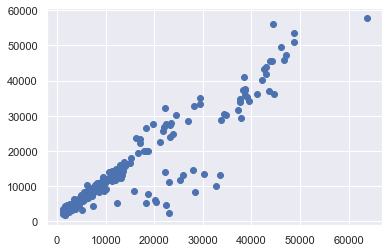

In [21]:
sns.set()
plt.figure(figsize=(6,4))
plt.scatter(Y_test,Y_pred)
plt.plot()

## Polynomial Regression(다항 회귀 분석), degree=3

In [56]:
poly_feature = PolynomialFeatures (degree = 3)
x_poly = poly_feature.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_poly,y, test_size=0.2,random_state=42)

poly = LinearRegression().fit(X_train,Y_train)

Y_pred = poly.predict(X_test)

In [57]:
r2_test = r2_score(Y_pred,Y_test)
print(r2_test)
mse_test = mean_squared_error(Y_pred,Y_test)
print(mse_test)
mae_test = mean_absolute_error(Y_pred,Y_test)
print(mae_test)

0.8251059618658994
23825979.73856704
2999.445569585821


In [58]:
print(poly.score(X_test,Y_test))

0.8465302775125763


[]

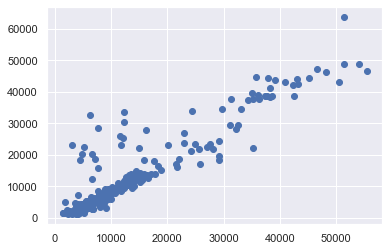

In [59]:
sns.set()
plt.figure(figsize=(6,4))
plt.scatter(Y_pred,Y_test)
plt.plot()